# Proyek Analisis Data: [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)
- **Nama:** Gregorius Ivan Halim
- **Email:** m271b4ky1645@bangkit.academy
- **ID Dicoding:** gregorius_ivan_halim

## Menentukan Pertanyaan Bisnis

- How do weather conditions and seasons influence the number of bicycle rentals from casual and registered users?
- How Bike rental trends have changed month by month over the years for both casual and registered users?
- What is the time of day when bike rentals are highest?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path

## Data Wrangling

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

### Gathering Data

In [3]:
data_directory = "data"
day_csv_filename = "day.csv"
hour_csv_filename = "hour.csv"

day_csv_file_path = path.join(data_directory, day_csv_filename)
hour_csv_file_path = path.join(data_directory, hour_csv_filename)

day_df = pd.read_csv(day_csv_file_path)
hour_df = pd.read_csv(hour_csv_file_path)

#### Day.csv Data in Dataframe

In [4]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### Hour.csv Data in Dataframe

In [5]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### **Insight:**
- All the Fields:
( 📝 **hr is not available in day.csv** 📝)
  - **instant**: Record index
  - **dteday**: Date
  - **season**: Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)
  - **yr**: Year (0: 2011, 1: 2012)
  - **mnth**: Month (1 to 12)
  - **hr**: Hour (0 to 23)
  - **holiday**: Indicates if the day is a holiday (extracted from [D.C. Holiday Schedule](http://dchr.dc.gov/page/holiday-schedule))
  - **weekday**: Day of the week
  - **workingday**: Indicates if the day is neither a weekend nor a holiday (1: Yes, 0: No)
  - **weathersit**:
    - 1: Clear, Few Clouds, Partly Cloudy
    - 2: Mist + Cloudy, Mist + Broken Clouds, Mist + Few Clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds
    - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
  - **temp**: Normalized temperature in Celsius (values divided by 41, the maximum)
  - **atemp**: Normalized "feels like" temperature in Celsius (values divided by 50, the maximum)
  - **hum**: Normalized humidity (values divided by 100, the maximum)
  - **windspeed**: Normalized wind speed (values divided by 67, the maximum)
  - **casual**: Count of casual users
  - **registered**: Count of registered users
  - **cnt**: Total count of rental bikes, including both casual and registered users


### Assessing Data

#### Info for Day Dataframe

In [6]:
day_df.info()
day_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


#### Info for Hour Dataframe

In [7]:
hour_df.info()
hour_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


#### Check for Missing Values in Both Dataframe


In [8]:
print("=" * 17)
print(" day df NA count")
print("=" * 17)
print(day_df.isna().sum())
print("=" * 17)
print(" hour df NA count")
print("=" * 17)
print(hour_df.isna().sum())

 day df NA count
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
 hour df NA count
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Check for Duplicate Values in Both Dataframe

In [9]:
print(f"day df duplicates: {day_df.duplicated().sum()}")
print(f"hour df duplicates: {hour_df.duplicated().sum()}")

day df duplicates: 0
hour df duplicates: 0


#### Check for Outliers

In [10]:
def detect_outlier_iqr(df, filter=[]):
  outliers = {}
  for col in df.select_dtypes(include=['float64', 'int64']).columns :
    if col in filter  : continue

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    min_range = q1 - (iqr * 1.5)
    max_range = q3 + (iqr * 1.5)

    outlier_mask = (df[col] < min_range) | (df[col] > max_range)
    if not df[outlier_mask].empty:
      outliers[col] = df[outlier_mask]

  return outliers

def outliers_summary(name, outliers):
    if(not outliers):
        print(f"{name} has no outliers")
        return
    print(f"{name} outliers")
    print("-" * 37)
    print(f"{'Column':<20} | {'Outlier Count':<15}")
    print("-" * 37)
    for col, outlier in outliers.items():
        print(f"{col:<20} | {len(outlier):<15}")

    print("=" * 37)

filtered_col = ['holiday', 'weathersit', 'season', 'yr', 'weekday', 'workingday']

outliers_day_df = detect_outlier_iqr(day_df, filtered_col)
outliers_summary("day_df", outliers_day_df)

outliers_hour_df = detect_outlier_iqr(hour_df, filtered_col)
outliers_summary("hour_df", outliers_hour_df)


day_df outliers
-------------------------------------
Column               | Outlier Count  
-------------------------------------
hum                  | 2              
windspeed            | 13             
casual               | 44             
hour_df outliers
-------------------------------------
Column               | Outlier Count  
-------------------------------------
hum                  | 22             
windspeed            | 342            
casual               | 1192           
registered           | 680            
cnt                  | 505            


**Insight:**
- There is no duplicate or missing values in both dataframe.
- Both dteday columns, which is supposed to represent dates, are still formatted as obj(String) instead of DateTime.
- the day_df, there are 3 columns with outliers: Hum has 2 outliers, Windspeed has 13 outliers, and Casual has 44 outliers.
- hour_df, there are 5 columns with outliers: Hum has 22 outliers, Windspeed has 342 outliers, Casual has 1192 outliers, Registered has 680 outliers, and Count has 505 outliers.

### Cleaning Data

#### Changing the dteday column types on both df

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### changing the outliers from both df

In [12]:
def replace_outliers(df, filter=[]):
  for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col in filter:
      continue

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    min_range = q1 - (iqr * 1.5)
    max_range = q3 + (iqr * 1.5)

    df.loc[df[col] < min_range, col] = min_range
    df.loc[df[col] > max_range, col] = max_range

  return df
replace_outliers(day_df, filtered_col)
replace_outliers(hour_df, filtered_col)

outliers_summary("day_df", detect_outlier_iqr(day_df, filtered_col))
outliers_summary("hour_df", detect_outlier_iqr(hour_df, filtered_col))

day_df['cnt'] = day_df['casual'] + day_df['registered']
hour_df['cnt'] = hour_df['casual'] + hour_df['registered']


day_df has no outliers
hour_df has no outliers


C:\Users\NAN0C\AppData\Local\Temp\ipykernel_8936\1817205523.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-855.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < min_range, col] = min_range
C:\Users\NAN0C\AppData\Local\Temp\ipykernel_8936\1817205523.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-922.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < min_range, col] = min_range
C:\Users\NAN0C\AppData\Local\Temp\ipykernel_8936\1817205523.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-321.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < min_range, c

**Insight:**
- dtday column datatype from both df has been changed from object(String) to DateTime.

- All the outliers in both DataFrames have been adjusted based on the IQR, with values changed to their respective minimum and maximum limits.

- Recalculated the cnt column by adding the casual and registered user counts together to obtain the total number of bike rentals.

## Exploratory Data Analysis (EDA)

#### Exploring the Factors of Weather Conditions and Seasons that Affect Bicycle Rental Rates for Casual and Registered Users


In [13]:
seasons = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

season_stats_df = day_df.groupby('season').agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt': 'sum'
}).reset_index()

#convert it from normalized form to its own original format
season_stats_df['temp'] = season_stats_df['temp'].apply(lambda x: x * 42)
season_stats_df['atemp'] = season_stats_df['atemp'].apply(lambda x: x * 50)
season_stats_df['hum'] = season_stats_df['hum'].apply(lambda x: x * 100)
season_stats_df['windspeed'] = season_stats_df['windspeed'].apply(lambda x: x * 67)
season_stats_df['season'] = season_stats_df['season'].apply(lambda x: seasons[x])

season_stats_df.rename(columns={
    'temp' : 'temp (°C)',
    'atemp': 'atemp (°C)',
    'hum': 'hum (%)',
    'windspeed': 'windspeed (m/s)'
}, inplace=True)

season_stats_df

,season,temp (°C),atemp (°C),hum (%),windspeed (m/s),casual,registered,cnt
0,Spring,12.505397,14.845697,58.412643,14.229444,59733.75,410726.0,470459.75
1,Summer,22.865017,26.015366,62.694833,13.628196,194430.00,715067.0,909497.00
2,Fall,29.664991,32.794920,63.348206,11.530366,221025.00,835038.0,1056063.00
3,Winter,17.762054,20.776937,66.871917,11.501406,127439.25,711831.0,839270.25


#### Correlation Between Weather Factor Effects and Bicycle Rental Rates for Casual and Registered Users

In [14]:
weather_effect_corr = day_df[['temp', 'atemp', 'hum', 'windspeed', 'registered', 'casual']].corr()

weather_effect_corr

,temp,atemp,hum,windspeed,registered,casual
temp,1.000000,0.991702,0.126722,-0.156916,0.540012,0.573796
atemp,0.991702,1.000000,0.139924,-0.182948,0.544192,0.574245
hum,0.126722,0.139924,1.000000,-0.241160,-0.095985,-0.075118
windspeed,-0.156916,-0.182948,-0.241160,1.000000,-0.216927,-0.178155
registered,0.540012,0.544192,-0.095985,-0.216927,1.000000,0.414917
casual,0.573796,0.574245,-0.075118,-0.178155,0.414917,1.000000


#### Exploring the bicycle rental trend each month every year for casual and registered users

In [15]:
month = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

year = {
    0: '2011',
    1: '2012'
}

bikes_trend_date_df = day_df[['mnth', 'yr', 'casual', 'registered', 'cnt']].groupby(['mnth', 'yr']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by=['yr', 'mnth']).reset_index()

bikes_trend_date_df['mnth'] = bikes_trend_date_df['mnth'].apply(lambda x: month[x])
bikes_trend_date_df['yr'] = bikes_trend_date_df['yr'].apply(lambda x: year[x])
bikes_trend_date_df['date'] = bikes_trend_date_df['mnth'] + ' ' + bikes_trend_date_df['yr'].astype(str)

bikes_trend_date_df

,mnth,yr,casual,registered,cnt,date
0,Jan,2011,3073.00,35116.0,38189.00,Jan 2011
1,Feb,2011,6242.00,41973.0,48215.00,Feb 2011
2,Mar,2011,12826.00,51219.0,64045.00,Mar 2011
3,Apr,2011,22346.00,72524.0,94870.00,Apr 2011
4,May,2011,30961.75,104771.0,135732.75,May 2011
5,Jun,2011,30612.00,112900.0,143512.00,Jun 2011
6,Jul,2011,35487.25,104889.0,140376.25,Jul 2011
7,Aug,2011,28842.00,107849.0,136691.00,Aug 2011
8,Sep,2011,26290.75,100873.0,127163.75,Sep 2011
9,Oct,2011,25091.75,98289.0,123380.75,Oct 2011


#### Exploring the difference in peak rental hours between parts of the day


In [16]:
parts_of_the_day = {
    'Morning': (5, 12),            # 5 AM to 11:59 AM
    'Afternoon': (12, 17),         # 12 PM to 4:59 PM
    'Evening': (17, 21),           # 5 PM to 8:59 PM
    'Night': (21, 5)               # 9 PM to 4:59 AM
}

def categorize_time(hr):
    if hr >= 21 or hr < 5:
        return 'Night'

    for parts, (start, end) in parts_of_the_day.items():
        if start <= hr < end:
            return parts
    return 'Unknown'

hour_df['time_segment'] = hour_df['hr'].apply(categorize_time)

time_trend_df = hour_df.groupby(['time_segment']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

time_trend_df

,time_segment,casual,registered,cnt
0,Afternoon,211039,689881,900920
1,Evening,145314,816098,961412
2,Morning,119309,766178,885487
3,Night,65847,311148,376995



**Insight:**

-  To answer the Factors of Weather Conditions and Seasons that Affect Bicycle Rental Rates for Casual and Registered Users the season_stats_df is created by grouping the dataframe day_df by season. For each season, season_stats_df calculate the average temperature, apparent temperature, humidity, and windspeed, along with the total sums of casual and registered bike rentals. Next, all normalized values are converted back to their original format using specific multipliers detailed in the Readme.txt file in the data folder. Temperature is multiplied by 42, apparent temperature by 50, humidity by 100, and windspeed by 67. Finally, revert the season codes to their corresponding names which is stated on the Readme.txt.

- To answer the the bicycle rental trend each month every year for casual and registered users, the bikes_trend_date_df is created by grouping the day_df dataframe by month and year. For each month and year, bikes_trend_date_df calculate the total sums of casual, registered, and total bike rentals. The results are also sorted by year for better clarity. After grouping, convert the numeric month and year values back to their original string formats. 

- To answer the difference in peak rental hours between parts of the day, the time_trend_df is created by categorizing each hour of the day into segments: Morning (5 AM to 11:59 AM), Afternoon (12 PM to 4:59 PM), Evening (5 PM to 8:59 PM), and Night (9 PM to 4:59 AM). Then function categorize_time assigns each hour in the hour_df DataFrame to its respective category based on the range mention above. Lastly grouping the data by these category, summing the total counts of casual, registered, and overall bike rentals. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: How do weather conditions and seasons influence the number of bicycle rentals from casual and registered users?

#### Plotting the season influence the number of bicycle rentals from casual and registered users

Text(0, 0.5, 'All Users')

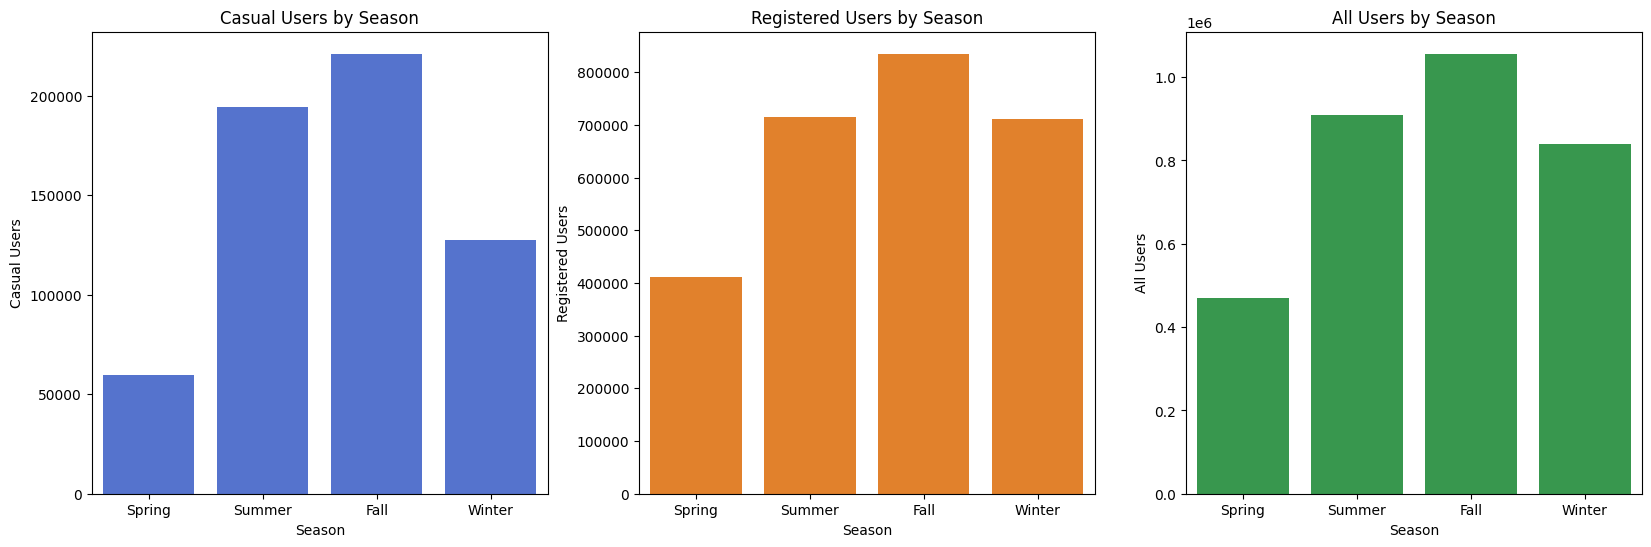

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(data=season_stats_df, x='season', y='casual', ax=ax[0], color='#4169E1')
ax[0].set_title('Casual Users by Season')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Casual Users')

sns.barplot(data=season_stats_df, x='season', y='registered', ax=ax[1], color='#FF7F0E')
ax[1].set_title('Registered Users by Season')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Registered Users')

sns.barplot(data=season_stats_df, x='season', y='cnt', ax=ax[2], color='#28A745')
ax[2].set_title('All Users by Season')
ax[2].set_xlabel('Season')
ax[2].set_ylabel('All Users')


#### Plotting the Correlation Between Weather Factor Effects and Bicycle Rental Rates for Casual and Registered Users

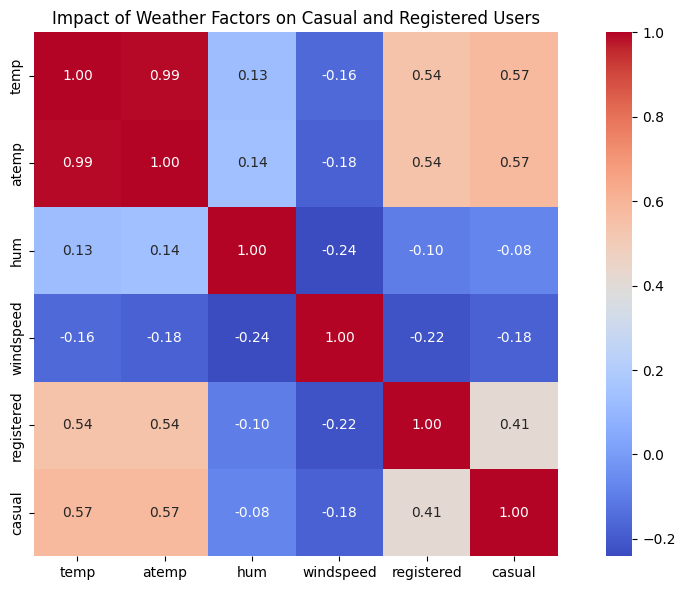

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(weather_effect_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Impact of Weather Factors on Casual and Registered Users')
plt.tight_layout()
plt.show()

### Pertanyaan 2: How Bike rental trends have changed month by month over the years for both casual and registered users?

#### Plotting the Bike rental trends by month over the years for both casual and registered users

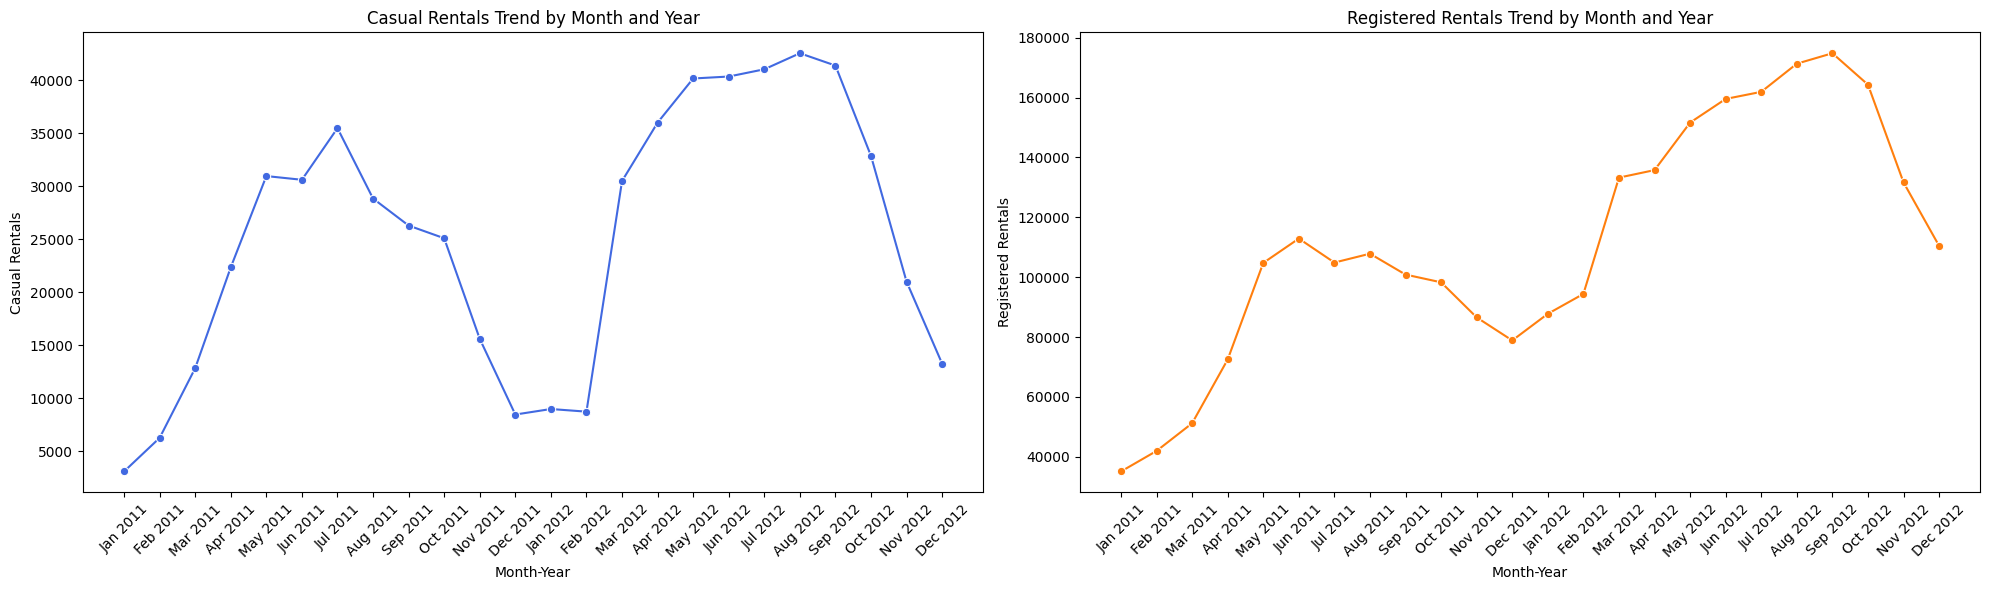

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.lineplot(data=bikes_trend_date_df, x='date', y='casual', marker='o', ax=ax[0], color='#4169E1')
ax[0].set_xlabel('Month-Year')
ax[0].set_ylabel('Casual Rentals')
ax[0].set_title('Casual Rentals Trend by Month and Year')
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45, ha='center')

sns.lineplot(data=bikes_trend_date_df, x='date', y='registered', marker='o', ax=ax[1], color='#FF7F0E')
ax[1].set_xlabel('Month-Year')
ax[1].set_ylabel('Registered Rentals')
ax[1].set_title('Registered Rentals Trend by Month and Year')
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45, ha='center')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Pertanyaan 3: What is the time of day when bike rentals are highest?

#### Plotting the differences in peak rental hours between parts of the day

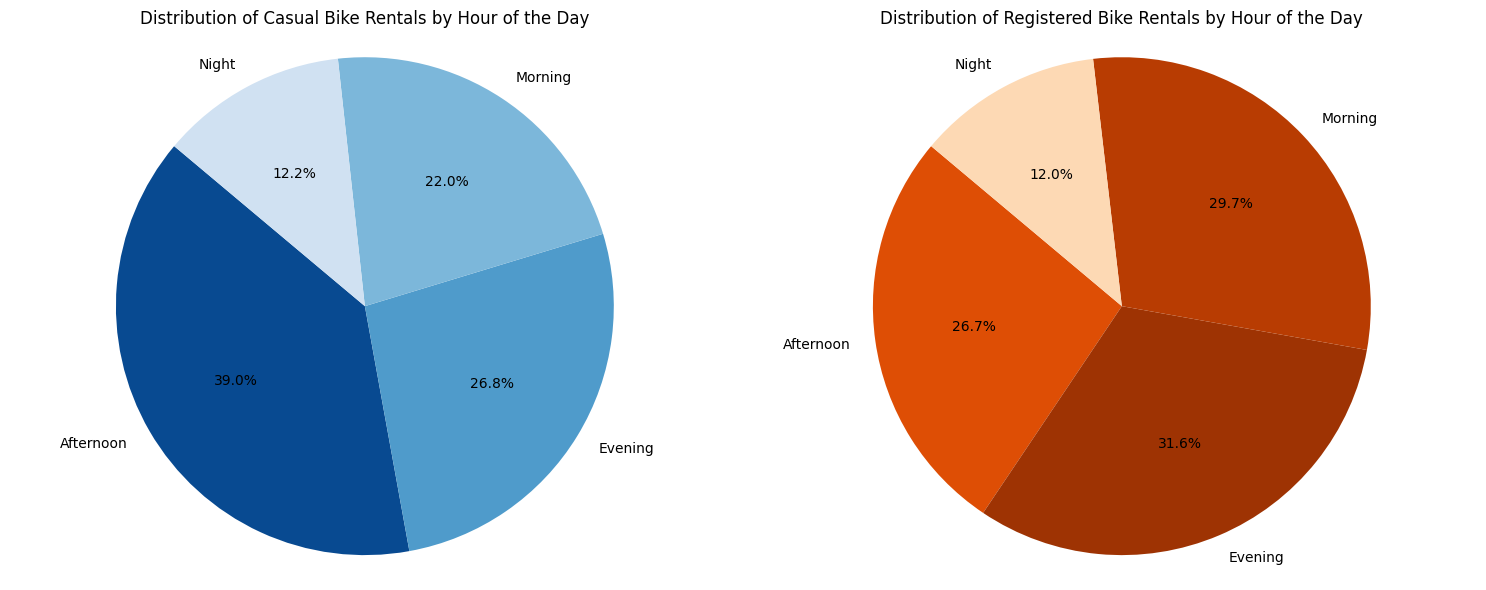

In [20]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

cmap_casual = sns.color_palette("Blues", as_cmap=True)
cmap_registered = sns.color_palette("Oranges", as_cmap=True)

casual_norm = plt.Normalize(time_trend_df['casual'].min(), time_trend_df['casual'].max())
registered_norm = plt.Normalize(time_trend_df['registered'].min(), time_trend_df['registered'].max())

colors_casual = [cmap_casual(0.2 +(casual_norm(value) * 0.7)) for value in time_trend_df['casual']]
colors_registered = [cmap_registered(0.2 + (registered_norm(value) * 0.7)) for value in time_trend_df['registered']]

ax[0].pie(time_trend_df['casual'], labels=time_trend_df['time_segment'], autopct='%1.1f%%', startangle=140, colors=colors_casual)
ax[0].set_title('Distribution of Casual Bike Rentals by Hour of the Day')
ax[0].axis('equal')

ax[1].pie(time_trend_df['registered'], labels=time_trend_df['time_segment'], autopct='%1.1f%%', startangle=140, colors=colors_registered)
ax[1].set_title('Distribution of Registered Bike Rentals by Hour of the Day')
ax[1].axis('equal')

plt.tight_layout() 
plt.show()




**Insight:**

weather conditions and seasons influence the number of bicycle rentals from casual and registered users insight : 

- During the Fall season, total rentals peak at 1,061,129, comprised of the highest casual rentals totaling to 226,091 and 835,038 registered rentals. Fall also boasts the highest average temperature at 29.66°C, with an apparent temperature of 32.79°C, an average windspeed of 11.53 m/s, and average humidity at 63.35%. Summer follows with 918,589 total rentals, including 203,522 casual and 715,067 registered rentals, along with the second-highest temperature of 22.87°C and an apparent temperature of 26.02°C. It experiences a higher average windspeed of 13.63 m/s and average humidity of 62.69%. Winter, with 841,613 rentals (129,782 casual and 711,831 registered), has the second-lowest average temperature at 17.76°C and an apparent temperature of 20.78°C, alongside an average windspeed of 11.52 m/s and humidity at 66.87%. Spring ranks lowest with 471,348 total rentals, consisting of 60,622 casual and 410,726 registered rentals. It features the lowest average temperature of 12.51°C, an apparent temperature of 14.85°C, the highest average windspeed at 14.37 m/s, and lower humidity at 58.29%.

- There is a significant difference in trends between casual and registered users from fall to winter. Casual rentals experience a more pronounced drop, while the number of registered users remains relatively stable on the change. This indicates that casual users are more sensitive to seasonal changes especially colder ones, where as registered users exhibit consistent usage regardless of the time of year.

- The analysis of the correlation matrix shows that both temperature and apparent temperature have a strong positive correlation with bike rentals, with values of 0.54 for registered rentals and 0.57 for casual rentals. This suggests that warmer weather significantly encourages more people to rent bikes. In contrast, humidity demonstrates a very low correlation with both registered rentals -0.10 and casual rentals -0.08, indicating that it does not play a significant role in influencing rental behavior. Lastly, windspeed shows a weak negative correlation, with values of -0.22 for registered rentals and -0.18 for casual rentals, implying that higher wind speeds may discourage individuals from renting bikes. 

Exploring Bike rental trends by month over the years for both casual and registered users insight : 

- September 2012 stands out with the highest total rentals at 216,190, comprising 41,395 casual rentals and 174,795 registered rentals. This peak can be attributed to favorable weather as summer transitions into fall, encouraging outdoor activities. In contrast, January 2011 records the lowest total rentals at just 38,189, with 3,073 casual rentals and 35,116 registered rentals, indicating a notable decline in biking activities during the colder months. There is also a significant increase in total rentals between 2011 and 2012 for both parties. Casual rentals appear to be more volatile then the registered rentals, showing sharp drops between August to December 2011, and really sharp increase in ferbuary 2022 to march 2022 as well as another  massive drop from september 2012 to december 2012. While casual rentals did show significant growth over the two-year span, they also experienced substantial fluctuations. In the other hand registered rentals increased in a steady pace. This shows growth in the rental scene, indicating that more casual rentals are being converted into registered rentals over time. 

Exploring the difference in peak rental hours between parts of the day insight :

- There is a significant difference in the distribution of casual rentals compared to registered rentals. Casual rentals peak in the afternoon, accounting for 39% of total rentals, followed by the evening at 26.8%. In contrast, registered rentals are highest in the evening, with 31.6% of total rentals, while the afternoon accounts for 26.7%. Additionally, registered rentals exhibit a more balanced distribution across morning, afternoon, and evening, whereas casual rentals are more concentrated in the afternoon. At night, there is no significant difference between casual and registered rentals.


## Conclusion

- Conclusion pertanyaan 1 : 
Weather conditions and seasonal changes significantly influence bicycle rentals among casual and registered users. Fall stands out as the peak season, with total rentals reaching 1,061,129, driven by the highest average temperatures and favorable conditions. Summer follows, while winter shows a marked decline in casual rentals, indicating that casual users are particularly sensitive to colder weather. Registered rentals remain more stable throughout the seasons. Correlation analysis reinforces these trends, revealing a strong positive relationship between temperature and rentals, particularly for casual users. In contrast, humidity and wind speed have minimal impacts on rental behavior.

- Conclusion pertanyaan 2 : 
Bike rentals are significantly higher during the hotter months compared to the colder ones. Favorable weather in warmer months encourages outdoor activities, while colder months see a notable decline in rentals. The overall increase in rentals from 2011 to 2012 indicates a positive trend, especially with registered rentals showing steady growth. Although casual rentals experienced volatility in both growth and loss, the data suggests successful conversions of casual users into registered users, reflecting a strengthening rental market.

- Conclusion pertanyaan 3 :
Casual and registered bike rentals show different distribution patterns. Casual rentals peak in the afternoon at 39%, while registered rentals are highest in the evening at 31.6%. Registered rentals exhibit a more balanced distribution throughout the day, whereas casual rentals are more concentrated in the afternoon. At night, both types of rentals show similar usage patterns.